In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


# Chi-Quadrat-Tests

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import chi2, chisquare

Neben Inferenzverfahren für Hypothesentests für Grundgesamtheitsparameter wie den Mittelwert $\mu$ und die Standardabweichung $\sigma$ gibt es statistische Verfahren, um Rückschlüsse auf die Verteilung einer Variablen zu ziehen. Diese Schlussfolgerungsmethoden beruhen auf der Chi-Quadrat-Verteilung ($\chi^2$) und werden daher als $\chi^2$-Tests bezeichnet.

Im folgenden Abschnitt werden der **Chi-Quadrat-Anpassungstest**, ein Hypothesentest, der angewandt wird, um Rückschlüsse auf die Verteilung einer Variablen zu ziehen, und der **Chi-Quadrat-Unabhängigkeitstest**, ein Hypothesentest, der angewandt wird, um zu entscheiden, ob ein Zusammenhang zwischen zwei Variablen einer Grundgesamtheit besteht, erörtert.

### $\chi^2$-Verteilung

**Grundlegende Eigenschaften von $\chi^2$-Kurven ({cite:t}`fahrmeirstatistik` s.279)**

- Die Gesamtfläche unter einer $\chi^2$-Kurve ist gleich $1$.
- Eine $\chi^2$-Kurve beginnt bei $0$ auf der horizontalen Achse und erstreckt sich unendlich weit nach rechts, wobei sie sich der horizontalen Achse nähert, diese aber nie berührt.
- Eine $\chi^2$-Kurve ist rechtsschief.
- Mit zunehmender Anzahl von Freiheitsgraden sehen $\chi^2$- Kurven zunehmend wie normale Kurven aus.

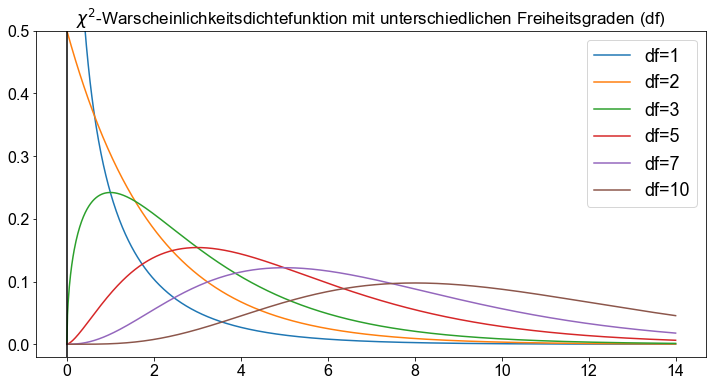

In [3]:
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt

df = [1, 2, 3, 5, 7, 10]

x = np.linspace(0, 14, 1000)
fig, ax = plt.subplots()
for _df in df:
    ax.plot(x, chi2.pdf(x, df=_df), label=f"df={_df}")
ax.set_title(
    "$\chi^2$-Warscheinlichkeitsdichtefunktion mit unterschiedlichen Freiheitsgraden (df)"
)
ax.legend(fontsize=18)
ax.set_ylim(-0.02, 0.5)
ax.axvline(0, color="k")

## Chi-Quadrat-Test auf Anpassungsgüte

Der **$\chi^2$-Anpassungstest** wird angewandt, um Hypothesentests über die Verteilung einer qualitativen (kategorialen) Variable oder einer diskreten quantitativen Variable, die nur endlich viele mögliche Werte hat, durchzuführen.

Die grundlegende Logik des $\chi^2$-Anpassungstest besteht darin, die Häufigkeiten von zwei Variablen zu vergleichen. Wir vergleichen die **beobachteten Häufigkeiten** einer Stichprobe mit den **erwarteten Häufigkeiten**.

Betrachten wir ein einfaches Beispiel:

Am $22$. September $2013$ fand in Deutschland die <a href="https://de.wikipedia.org/wiki/Bundestagswahl_2013">Bundestagswahl $2013$</a> statt. Mehr als $44$ Millionen Menschen gingen zur Wahl. $41,5 \%$ der deutschen Wähler entschieden sich für die Christlich Demokratische Union (CDU) und $25,7 \%$ für die Sozialdemokratische Partei (SPD). Der Einfachheit halber fassen wir den verbleibenden Prozentsatz der Stimmen ($32,8 \%$) als Sonstige zusammen.

Auf der Grundlage dieser Daten können wir eine Häufigkeitstabelle erstellen.

|Partei|Prozent|Relative Häufigkeit|
|---|:---:|:---:|
|CDU|41,5|0,415|
|SPD|25,7|0,257|
|Sonstige|32,8|0,328|
||100|1|


Die dritte Spalte der obigen Tabelle entspricht den **relativen Häufigkeiten** in der deutschen Bevölkerung/Wählerschaft. Für diese Übung nehmen wir eine Zufallsstichprobe. Wir befragen $123$ Studierende der FU Berlin nach ihrer Parteizugehörigkeit und halten die folgenden Antworten fest.

In [4]:
sample = [
    "SPD",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "CDU",
    "CDU",
    "CDU",
    "CDU",
    "SPD",
    "CDU",
    "Sonstige",
    "SPD",
    "CDU",
    "SPD",
    "Sonstige",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "Sonstige",
    "Sonstige",
    "SPD",
    "CDU",
    "CDU",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "SPD",
    "Sonstige",
    "CDU",
    "CDU",
    "CDU",
    "CDU",
    "SPD",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "Sonstige",
    "SPD",
    "Sonstige",
    "CDU",
    "SPD",
    "SPD",
    "Sonstige",
    "SPD",
    "Sonstige",
    "Sonstige",
    "SPD",
    "SPD",
    "CDU",
    "Sonstige",
    "Sonstige",
    "Sonstige",
    "CDU",
    "CDU",
    "CDU",
    "SPD",
    "Sonstige",
    "SPD",
    "Sonstige",
    "Sonstige",
    "CDU",
    "SPD",
    "CDU",
    "SPD",
    "Sonstige",
    "CDU",
    "Sonstige",
    "CDU",
    "Sonstige",
    "CDU",
    "Sonstige",
    "SPD",
    "CDU",
    "CDU",
    "Sonstige",
    "Sonstige",
    "CDU",
    "Sonstige",
    "Sonstige",
    "SPD",
    "CDU",
    "Sonstige",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "CDU",
    "CDU",
    "SPD",
    "SPD",
    "Sonstige",
    "Sonstige",
    "SPD",
    "CDU",
    "Sonstige",
    "CDU",
    "Sonstige",
    "Sonstige",
    "SPD",
    "SPD",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "SPD",
    "CDU",
    "Sonstige",
    "CDU",
    "CDU",
    "CDU",
    "CDU",
    "CDU",
    "Sonstige",
    "Sonstige",
    "SPD",
]

Im nächsten Schritt zählen wir das Auftreten der einzelnen Kategorien (Parteien) in unserer Stichprobe. Diese Größen sind die **beobachteten Häufigkeiten**.

In [5]:
[f"{l}: {sample.count(l)}" for l in set(sample)]

['Sonstige: 40', 'SPD: 26', 'CDU: 57']

Im nächsten Schritt berechnen wir die **erwartete Häufigkeit** ($E$) für jede Kategorie.

$$E = n \times p\text{,}$$

wobei $n$ der Stichprobenumfang und $p$ die entsprechende relative Häufigkeit aus der obigen Tabelle ist.

$$E_{CDU} = n\times p = 123 \times 0,415 = 51,045$$

$$E_{SPD} = n\times p = 123 \times 0,257 = 31,611$$

$$E_{Sonstige} = n\times p = 123 \times 0,382 = 46,986$$

Beachten Sie, dass es sich zwar um einzelne Zählungen handelt, die durch ganzzahlige Werte dargestellt werden, die **erwartete Häufigkeit**, $E$ eine Fließkommazahl ist. Das ist in Ordnung.

Nun werden die **beobachteten Häufigkeiten** und die **erwarteten Häufigkeiten** in einer Tabelle zusammengeführt.

|Partei|Beobachtete Häufigkeit|Erwartete Häufigkeit|
|---|:---:|:---:|
|CDU|57|51,045|
|SPD|26|31,611|
|Sonstige|40|46,986|
||123|129,642|

Großartig! Sobald wir die erwarteten Häufigkeiten kennen, müssen wir auf zwei Annahmen prüfen. Erstens müssen wir sicherstellen, dass alle erwarteten Häufigkeiten $1$ oder größer sind, und zweitens, dass höchstens $20 \%$ der erwarteten Häufigkeiten kleiner als $5$ sind. Durch einen Blick auf die Tabelle können wir bestätigen, dass beide Annahmen erfüllt sind.

Jetzt haben wir alle Zutaten, die wir brauchen, außer der Teststatistik, um einen $\chi^2$-Anpassungstest durchzuführen.

Die $\chi^2$ Teststatistik für die Anpassungsgüte ist gegeben durch

$$\chi^2=\sum \frac{(O-E)^2}{E}\text{,}$$

wobei $O$ den beobachteten Häufigkeiten und $E$ den erwarteten Häufigkeiten entspricht. Die Teststatistik $\chi^2$ approximiert eine *Chi-Quadrat*-Verteilung, wenn die Nullhypothese wahr ist. Die Zahl der Freiheitsgrade ist um $1$ kleiner als die Zahl der möglichen Werte (Kategorien) für die betrachtete Variable.

$$df = c-1$$

Ausgehend von den in der obigen Tabelle angegebenen beobachteten und erwarteten Häufigkeiten lässt sich der $\chi^2$-Wert relativ einfach berechnen. Um das Berechnungsverfahren jedoch übersichtlicher zu gestalten, haben wir alle erforderlichen Berechnungsschritte in einer Tabelle zusammengefasst.

|Partei|Beobachtete Häufigkeit|Erwartete Häufigkeit|Differenz $O-E$|Quadrat der Differenz $(O-E)^2$|$\chi^2$ Zwischensumme $(O-E)^2 / E$|
|---|:---:|:---:|:---:|:---:|:---:|
|CDU|57|51,045|5,955|35,462025|0,6947208|
|SPD|26|31,611|-5,611|31,483321|0,9959609|
|Sonstige|40|46,986|-6,986|48,804196|1,0386965|
||123|129,642|-6,642|||

In unserem Beispiel ergibt die $\chi^2$-Teststatistik für die Anpassungsgüte den Wert

$$\chi^2=\sum \frac{(O-E)^2}{E} \approx2,729$$

Wenn die Nullhypothese wahr ist, sind die beobachtete und die erwartete Häufigkeit ungefähr gleich. Dies führt zu einem kleinen Wert der $\chi^2$-Teststatistik und unterstützt somit $H_0$. Ist der Wert der $\chi^2$-Teststatistik jedoch groß, liefern die Daten Beweise gegen $H_0$.

### $\chi^2$-Anpassungstest: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den $\chi^2$ Anpassungstest in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [6]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

Es sei daran erinnert, dass $\chi^2$-Anpassungstests für qualitative (kategoriale) Variablen oder diskrete quantitative Variablen angewendet werden. Der `students` Datensatz enthält mehrere kategoriale Variablen, wie z. B. `gender`, `religion`, `major`, `minor` und `graduated`.

Um den $\chi^2$-Anpassungstest zu veranschaulichen, untersuchen wir, ob die Religion unter den Studierenden gleichmäßig verteilt ist, verglichen mit der Verteilung der Religion in der Bevölkerung der Europäischen Union. Die Daten auf kontinentaler Ebene stammen aus dem Bericht "Discrimination in the EU in $2012$" (<a href="https://europa.eu/eurobarometer/api/archives/ebs/ebs_393_en.pdf">European Union: European Commission, Special Eurobarometer, $393$, p. $233$</a>). Der Bericht enthält Daten für $8$ Kategorien: $48 \%$ der Menschen werden als Katholiken, $16 \%$ als Nichtgläubige/Agnostiker, $12 \%$ als Protestanten, $8 \%$ als Orthodoxe, $7 \%$ als Atheisten, $4 \%$ als sonstige Christen, $3 \%$ als sonstige Religion/keine Angabe und $2 \%$ als Muslime eingestuft. Zum besseren Verständnis stellen wir die Daten in Form eines Tortendiagramms dar.

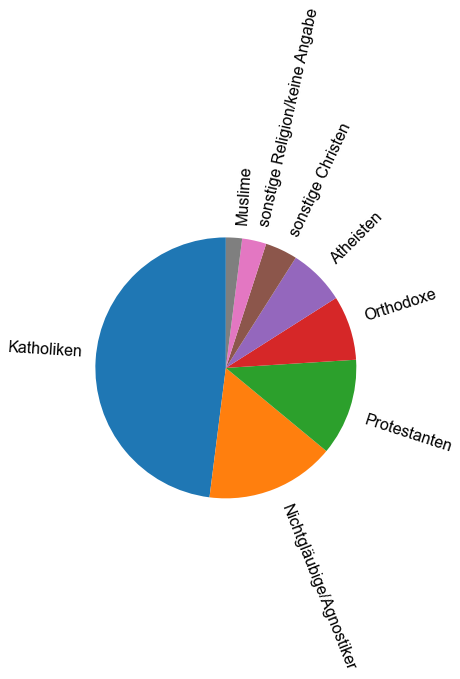

In [7]:
# Erzeuge Pie chart
y = np.array([48, 16, 12, 8, 7, 4, 3, 2])
mylabels = [
    "Katholiken",
    "Nichtgläubige/Agnostiker",
    "Protestanten",
    "Orthodoxe",
    "Atheisten",
    "sonstige Christen",
    "sonstige Religion/keine Angabe",
    "Muslime",
]

plt.pie(y, labels=mylabels, startangle=90, labeldistance=1.1, rotatelabels=True)
plt.show()

### Vorbereitung der Daten

Wir beginnen mit der Datenexploration und der Datenaufbereitung.

Zunächst wollen wir wissen, welche Kategorien im Datensatz vorhanden sind. Dazu wenden wir die Funktion `unique()` an, die die einzelnen Spaltennamen (Kategorien) ausgibt.

In [8]:
students["religion"].unique()

array(['Muslim', 'Other', 'Protestant', 'Catholic', 'Orthodox'],
      dtype=object)

Offensichtlich gibt es in den *Studenten*daten $5$ weniger Kategorien, im Vergleich zu den $8$ Kategorien, die im EU-Bericht angegeben sind. Um Vergleiche anstellen zu können, kodieren wir die Kategorien der Religionsvariable um, um schließlich $5$ Kategorien zu erhalten: "Katholisch", "Muslimisch", "Orthodox", "Protestantisch" und "Sonstige". Achten Sie bei diesem Schritt darauf, dass Sie die Kategorien nicht verwechseln!

In [9]:
# Lege Kategorien zusammen
raw_data = [
    ("Other", (16 + 7 + 4 + 3)),
    ("Catholic", 48),
    ("Protestant", 12),
    ("Orthodox", 8),
    ("Muslim", 2),
]

data = pd.DataFrame(raw_data, columns=["Religion", "absoulte Häufigkeit"])
data["relative Häufigkeit"] = data["absoulte Häufigkeit"] / 100
data = data.set_index("Religion")
data

,absoulte Häufigkeit,relative Häufigkeit
Religion,,
Other,30,0.30
Catholic,48,0.48
Protestant,12,0.12
Orthodox,8,0.08
Muslim,2,0.02


Nun nehmen wir eine Zufallsstichprobe. Wir wählen $256$ Studenten nach dem Zufallsprinzip aus und zählen mit der Funktion `value_counts()` die Anzahl der Studenten in jeder bestimmten Kategorie der Variablen `religion`. Wir erinnern uns, dass diese Menge den **beobachteten Häufigkeiten** entspricht.

In [10]:
n = 256
students_sample = students["religion"].sample(n, random_state=1)
sample_frequencies = students_sample.value_counts()
sample_frequencies

Other         85
Catholic      77
Protestant    60
Orthodox      27
Muslim         7
Name: religion, dtype: int64

Mit einer einzigen Code-Zeile fügen wir die beobachteten Häufigkeiten in `data` ein, den `dataframe`, den wir oben konstruiert haben.

In [11]:
data["beobachtete Häufigkeit"] = sample_frequencies
data

,absoulte Häufigkeit,relative Häufigkeit,beobachtete Häufigkeit
Religion,,,
Other,30,0.30,85
Catholic,48,0.48,77
Protestant,12,0.12,60
Orthodox,8,0.08,27
Muslim,2,0.02,7


Im nächsten Schritt berechnen wir die erwarteten Häufigkeiten. Erinnern Sie sich an die Gleichung:

$$E = n \times p$$

Wir fügen die erwarteten Häufigkeiten als neue Spalte in `data` ein.

In [12]:
data["erwartete Häufigkeit"] = n * data["relative Häufigkeit"]
data

,absoulte Häufigkeit,relative Häufigkeit,beobachtete Häufigkeit,erwartete Häufigkeit
Religion,,,,
Other,30,0.30,85,76.80
Catholic,48,0.48,77,122.88
Protestant,12,0.12,60,30.72
Orthodox,8,0.08,27,20.48
Muslim,2,0.02,7,5.12


Sobald wir die erwarteten Häufigkeiten kennen, müssen wir zwei Annahmen überprüfen. Erstens müssen wir sicherstellen, dass alle erwarteten Häufigkeiten $1$ oder größer sind, und zweitens, dass höchstens $20 \%$ der erwarteten Häufigkeiten kleiner als $5$ sind. Durch einen Blick auf die Tabelle können wir bestätigen, dass beide Annahmen erfüllt sind.

Perfekt, jetzt sind wir fertig! Der Datensatz ist bereit für die Analyse mit dem $\chi^2$ Anpassungstest zu analysieren. Erinnern Sie sich an die Frage, an der wir interessiert sind: **Ist die Religion unter den Studierenden gleichmäßig verteilt, verglichen mit der Verteilung der Religion in der Bevölkerung der Europäischen Union?**

### Überprüfung der Hypothesen

Zur Durchführung des $\chi^2$ Anpassungstests folgen wir dem schrittweisen Durchführungsverfahren für Hypothesentests. Der $\chi^2$ Anpassungstest folgt demselben schrittweisen Verfahren wie Hypothesentests für den Grundgesamtheitsmittelwert.

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn} \ p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass die Religion unter den Studenten gleich verteilt ist, verglichen mit der Verteilung der Religion in der Bevölkerung der Europäischen Union.

$H_0:\text{Die Variable hat die angegebene Verteilung}$

**Alternative Hypothese**

$H_A:\text{Die Variable hat nicht die angegebene Verteilung}$

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,01$$

In [13]:
alpha = 0.01

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben:

$$\chi^2=\sum \frac{(O-E)^2}{E}$$

In [14]:
# Berechne Teststatistik
x2 = sum(
    (data["beobachtete Häufigkeit"] - data["erwartete Häufigkeit"]) ** 2
    / data["erwartete Häufigkeit"]
)
x2

48.679361979166664

Der numerische Wert der Teststatistik beträgt $\approx 48,67936$.

Um den $p$-Wert zu berechnen, verwenden wir die Funktion `chi2.cdf()`. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet:

$$df = (c - 1)$$

In [15]:
# Berechne df
df = len(data) - 1

# Berechne p-Wert
p = chi2.sf(x2, df=df)
p

6.811017529549072e-10

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [16]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,01$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $1 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=6,8110175 \cdot 10^{-10}$. Bei einem Signifikanzniveau von $1 \%$ lassen die Daten den Schluss zu, dass die Religionsverteilung unter den Studenten von der Religionsverteilung der Bevölkerung der Europäischen Union abweicht.

### Hypothesentests in Python

Wir haben gerade einen $\chi^2$ Anpassungstest in Python manuell durchgeführt. Sehr cool, aber jetzt wiederholen wir dieses Beispiel und nutzen die Python-Maschinerie, um das gleiche Ergebnis wie oben mit nur einer Zeile Code zu erhalten!

Für die Durchführung eines $\chi^2$ Anpassungsgüte-Test in Python durchzuführen, verwenden wir die Funktion `chisquare()`. Wir geben zwei Vektoren als Daten ein: `data['beobachtete Häufigkeit']` und `data['erwartete Häufigkeit']`.

In [17]:
# Führe Chi-Square Goodness of Fit Test durch
chisquare(f_obs=data["beobachtete Häufigkeit"], f_exp=data["erwartete Häufigkeit"])

Power_divergenceResult(statistic=48.679361979166664, pvalue=6.811017529549072e-10)

Es hat gut funktioniert! Vergleichen Sie die Ausgabe der Funktion `chisquare()` mit unserem Ergebnis von oben. Auch hier können wir feststellen, dass die Daten bei einem Signifikanzniveau von $1 \%$ sehr starke Hinweise darauf liefern, dass sich die Religionsverteilung unter den Schülern von der Religionsverteilung der Bevölkerung der Europäischen Union unterscheidet.

In [18]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black

---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


<Figure size 864x432 with 0 Axes>

## Der Chi-Quadrat-Unabhängigkeitstest

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import chi2, chi2_contingency

Der **$\chi^2$ Unabhängigkeitstest** ist eine inferentielle Methode, um zu entscheiden, ob ein Zusammenhang zwischen zwei Variablen besteht. Ähnlich wie bei anderen Hypothesentests besagt die Nullhypothese, dass die beiden Variablen nicht miteinander verbunden sind. Im Gegensatz dazu besagt die Alternativhypothese, dass die beiden Variablen miteinander verbunden sind.

Es sei daran erinnert, dass statistisch **abhängige Variablen** als **assoziierte Variablen** bezeichnet werden. Im Gegensatz dazu werden nicht-assoziierte Variablen als statistisch unabhängige Variablen bezeichnet. Erinnern Sie sich auch an das Konzept der <a href="https://de.wikipedia.org/wiki/Kontingenztafel">Kontingenztabellen</a> (auch als Zwei-Wege-Tabellen oder Kreuztabellen bezeichnet), in denen die Häufigkeitsverteilungen von bivariaten Daten dargestellt werden.

### $\chi^2$-Unabhängigkeitstest

Die Grundidee des **$\chi^2$-Unabhängigkeitstests** besteht darin, die **beobachteten Häufigkeiten** in einer Kontingenztabelle mit den **erwarteten Häufigkeiten** zu vergleichen, unter der Annahme das die Nullhypothese der Nicht-Assoziation wahr ist. Die erwartete Häufigkeit für jede Zelle einer Kontingenztabelle ist gegeben durch

$$E = \frac{R\times C}{n} \text{,}$$

wobei $R$ die Zeilensumme ist, $C$ die Spaltensumme und $n$ der Stichprobenumfang ist.

Lassen Sie uns zum besseren Verständnis ein Beispiel konstruieren. Wir betrachten eine Exit Poll in Form einer Kontingenztabelle, die das Alter von $n=1189$ Personen in den Kategorien $18-29$, $30-44$, $45-64$ und $\gt 65$ Jahre und ihre politische Zugehörigkeit, d. h. "Konservativ", "Sozialistisch" und "Andere" aufgliedert. Diese Tabelle entspricht den beobachteten Häufigkeiten.

**Beobachtete Häufigkeiten:**

$$
\begin{array}{|l|c|}
\hline
\ & \text{Konservativ} & \text{Sozialistisch} & \text{Andere} & \text{Insgesamt} \\
\hline
\ \text{18-29}  & 141 & 68 & 4 & 213\\
\ \text{30-44}  & 179 & 159 & 7 & 345\\
\ \text{45-64} & 220 & 216 & 4 & 440\\
\ \text{65 & älter} & 86 & 101 & 4 & 191\\
\hline 
\  \text{Insgesamt} & 626 & 544 & 19 & 1189\\
\hline 
\end{array}
$$

Auf der Grundlage der oben genannten Gleichung berechnen wir die erwartete Häufigkeit für jede Zelle.

**Erwartete Häufigkeiten:**

$$
\begin{array}{|l|c|}
\hline
\ & \text{Konservativ} & \text{Sozialistisch} & \text{Andere} & \text{Insgesamt} \\
\hline
\ \text{18-29}  & \frac{213 \times 626 }{1189} \approx 112,14 & \frac{213 \times 544 }{1189} \approx97,45 & \frac{213 \times 19 }{1189} \approx3,4 & 213\\
\ \text{30-44}  & \frac{345 \times 626 }{1189} \approx181,64 &\frac{345 \times 544 }{1189} \approx 157,85 & \frac{345 \times 19 }{1189} \approx5,51 & 345\\
\ \text{45-64} & \frac{440 \times 626 }{1189} \approx231,66 & \frac{440 \times 544 }{1189} \approx201,31 &\frac{440 \times 19 }{1189} \approx 7,03 & 440\\
\ \text{65 & älter} &\frac{191 \times 626 }{1189} \approx 100,56 &\frac{191 \times 544 }{1189} \approx 87,39 & \frac{191 \times 19 }{1189} \approx3,05 & 191\\
\hline 
\ \text{Insgesamt} & 626 & 544 & 19 & 1189\\
\hline 
\end{array}
$$

Sobald wir die erwarteten Häufigkeiten kennen, müssen wir zwei Annahmen überprüfen. Erstens müssen wir sicherstellen, dass alle erwarteten Häufigkeiten $1$ oder größer sind, und zweitens, dass höchstens $20 \%$ der erwarteten Häufigkeiten kleiner als $5$ sind. Ein Blick auf die Tabelle bestätigt, dass beide Annahmen erfüllt sind.

Der eigentliche Vergleich erfolgt auf der Grundlage der $\chi^2$ Teststatistik für die beobachtete Häufigkeit und die erwartete Häufigkeit. Die -Teststatistik folgt der $\chi^2$-Verteilung und ist gegeben durch

$$\chi^2= \sum{\frac{(O-E)^2}{E}}\text{,}$$

wobei $O$ für die beobachtete Häufigkeit und $E$ für die erwartete Häufigkeit steht. Bitte beachten Sie, dass $\frac{(O-E)^2}{E}$ für jede Zelle ausgewertet und dann aufsummiert wird.

Die Anzahl der Freiheitsgrade ist gegeben durch

$$df = (r-1) \times (c-1)\text{,}$$

wobei $r$ und $c$ die Anzahl der möglichen Werte für die beiden betrachteten Variablen sind.

Übertragen auf das obige Beispiel führt dies zu einem etwas langen Ausdruck, der der Kürze halber nur für die erste und die letzte Zeile der interessierenden Kontingenztafeln angegeben wird.

$$\chi^2 = \frac{(141 - 112,14)^2}{112,14} + \frac{(68 - 97,45)^2}{97,45} + \frac{(4 - 3,4)^2}{3,4}  + \cdots + \frac{(86 - 100,56)^2}{100,56} + \frac{(101 - 87,39)^2}{87,39} + \frac{(4 - 3,05)^2}{3,05}$$

Wenn die Nullhypothese wahr ist, sind die beobachtete und die erwartete Häufigkeit ungefähr gleich, was zu einem kleinen Wert der $\chi^2$-Teststatistik führt und somit $H_0$ unterstützt. Ist der Wert der $\chi^2$-Teststatistik jedoch groß, liefern die Daten Beweise gegen $H_0$. In den nächsten Abschnitten wird weiter erörtert, wie der Wert der $\chi^2$-Teststatistik im Rahmen der Hypothesentests zu bewerten ist.

### $\chi^2$ Unabhängigkeitstest: Ein Beispiel

Um praktische Erfahrungen zu sammeln, wenden wir den $\chi^2$ Unabhängigkeitstest in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [20]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus $8239$ Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und $16$ Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: *stud_id, name, gender, age, height, weight, religion, nc_score, semester, major, minor, score1, score2, online_tutorial, graduated, salary.*

In dieser Übung wollen wir untersuchen, **ob es einen Zusammenhang zwischen den Variablen `gender` und `major` gibt, oder mit anderen Worten, wir wollen wissen, ob männliche Studenten andere Studienfächer bevorzugen als weibliche Studenten.**

### Vorbereitung der Daten

Wir beginnen mit der Datenaufbereitung. Da wir nicht den gesamten Datensatz von $8239$ Einträgen bearbeiten wollen, wählen wir zufällig $865$ Studenten aus dem Datensatz aus. Der erste Schritt der Datenvorbereitung besteht darin, die interessierenden Daten in Form einer Kontingenztabelle darzustellen. Pandas bietet die Funktion `crosstab()`, die diese Aufgabe übernehmen wird.

In [21]:
n = 865
data = students.sample(n, random_state=1)
pd.crosstab(index=data["major"], columns=data["gender"])

gender,Female,Male
major,,
Biology,89,65
Economics and Finance,55,79
Environmental Sciences,99,96
Mathematics and Statistics,39,92
Political Science,112,40
Social Sciences,70,29


Außerdem bestimmen wir die Spaltensummen und die Zeilensummen. Python bietet das Argument `margins = True`, das die Zeilensummen und die Spaltensummen für uns hinzufügt.

In [22]:
observed_frequencies = pd.crosstab(
    index=data["major"], columns=data["gender"], margins=True
)
observed_frequencies

gender,Female,Male,All
major,,,
Biology,89,65,154
Economics and Finance,55,79,134
Environmental Sciences,99,96,195
Mathematics and Statistics,39,92,131
Political Science,112,40,152
Social Sciences,70,29,99
All,464,401,865


Im nächsten Schritt konstruieren wir die **erwarteten Häufigkeiten**. Erinnern Sie sich an die Gleichung von oben:

$$E = \frac{R\times C}{n} \text{,}$$

wobei $R$ die Zeilensumme ist, $C$ die Spaltensumme und $n$ der Stichprobenumfang ist.

Wir berechnen die erwarteten Häufigkeiten mit der Numpy-Funktion `outer`. Das Ergebnis wandeln wir dann in eine Pandas `DataFrame` um.

In [23]:
rows = observed_frequencies["All"].values
cols = observed_frequencies.loc["All"].values
n = observed_frequencies.loc["All", "All"]

In [24]:
expected_frequencies = pd.DataFrame(
    np.outer(rows, cols) / n,
    index=observed_frequencies.index,
    columns=observed_frequencies.columns,
)

In [25]:
expected_frequencies

gender,Female,Male,All
major,,,
Biology,82.608092,71.391908,154.0
Economics and Finance,71.879769,62.120231,134.0
Environmental Sciences,104.601156,90.398844,195.0
Mathematics and Statistics,70.270520,60.729480,131.0
Political Science,81.535260,70.464740,152.0
Social Sciences,53.105202,45.894798,99.0
All,464.000000,401.000000,865.0


Sobald wir die erwarteten Häufigkeiten kennen, müssen wir zwei Annahmen überprüfen. Erstens müssen wir sicherstellen, dass alle erwarteten Häufigkeiten $1$ oder größer sind, und zweitens, dass höchstens $20 \%$ der erwarteten Häufigkeiten kleiner als $5$ sind. Durch einen Blick auf die Tabelle können wir bestätigen, dass beide Annahmen erfüllt sind.

Jetzt haben wir alle Daten, die wir für einen $\chi^2$ Unabhängigkeitstest durchzuführen.

### Überprüfung der Hypothesen

Zur Durchführung des **$\chi^2$-Unabhängigkeitstests** folgen wir dem Verfahren der schrittweisen Durchführung von Hypothesentests. Der **$\chi^2$-Unabhängigkeitstest** folgt demselben schrittweisen Verfahren wie in den vorangegangenen Abschnitten beschrieben. 

$$
\begin{array}{l}
\hline
\ \text{Schritt 1}  & \text{Geben Sie die Nullhypothese } H_0 \text{ und alternative Hypothese } H_A \text{ an.}\\
\ \text{Schritt 2}  & \text{Legen Sie das Signifikanzniveau, } \alpha\text{ fest.} \\
\ \text{Schritt 3}  & \text{Berechnen Sie den Wert der Teststatistik.} \\
\ \text{Schritt 4} &\text{Bestimmen Sie den p-Wert.} \\
\ \text{Schritt 5} & \text{Wenn} \ p \le \alpha \text{, } H_0 \text{ ablehnen } \text{; ansonsten } H_0 \text{ nicht ablehnen} \text{.} \\
\ \text{Schritt 6} &\text{Interpretieren Sie das Ergebnis des Hypothesentests.} \\
\hline 
\end{array}
$$

**Schritt 1 : Geben Sie die Nullhypothese $H_0$ und alternative Hypothese $H_A$ an**

Die Nullhypothese besagt, dass es keinen Zusammenhang zwischen dem Geschlecht und dem Hauptstudienfach der Studierenden gibt.

$$H_0:\text{Kein Zusammenhang zwischen Geschlecht und Studienschwerpunkt}$$

**Alternative Hypothese**

$$H_A:\text{Es gibt einen Zusammenhang zwischen dem Geschlecht und dem Hauptstudienfach}$$

**Schritt 2: Legen Sie das Signifikanzniveau,$\alpha$ fest**

$$\alpha = 0,05$$

In [26]:
alpha = 0.05

**Schritt 3 und 4: Berechnen Sie den Wert der Teststatistik und den $p$-Wert**

Zur Veranschaulichung berechnen wir die Teststatistik manuell in Python. Erinnern Sie sich an die Gleichung für die Teststatistik von oben:

$$\chi^2= \sum{\frac{(O-E)^2}{E}}\text{,}$$

wobei $O$ für die beobachtete Häufigkeit und $E$ für die erwartete Häufigkeit steht.

In [27]:
chi_2 = (
    ((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
    .sum(axis=1)
    .sum()
)
chi_2

76.42971653913816

Der numerische Wert der Teststatistik beträgt $\approx 76,43$.

Um den $p$-Wert zu berechnen, verwenden wir die Funktion `chi2.cdf()`. Erinnern Sie sich daran, wie man die Freiheitsgrade berechnet:

$$df = (r-1) \times (c-1)\text{,}$$

wobei $r$ und $c$ die Anzahl der möglichen Werte für die beiden betrachteten Variablen sind.

In [28]:
df = (observed_frequencies.index.drop("All").nunique() - 1) * (
    observed_frequencies.columns.drop("All").nunique() - 1
)
df

5

In [29]:
p = chi2.sf(chi_2, df)
p

4.678888864647207e-15

**Schritt 5: Wenn $p \le \alpha , H_0$ ablehnen; ansonsten $H_0$ nicht ablehnen**

In [30]:
p <= alpha

True

Der $p$-Wert ist kleiner als das angegebene Signifikanzniveau von $0,05$; wir verwerfen $H_0$. Die Testergebnisse sind statistisch signifikant auf dem $5 \%$-Niveau und liefern einen sehr starken Beweis gegen die Nullhypothese.

**Schritt 6: Interpretieren Sie das Ergebnis des Hypothesentests**

$p=4,67888886 \cdot 10^{-15}$. Bei einem Signifikanzniveau von $5 \%$ lassen die Daten den Schluss zu, dass es einen Zusammenhang zwischen dem Geschlecht und dem Hauptstudienfach gibt

### Hypothesentests in Python

Wir haben gerade einen $\chi^2$ Unabhängigkeitstest manuell durchgeführt. Wir können dasselbe in Python mit nur einer Zeile Code tun!

Dazu wenden wir die Funktion `chi2_contingency()` an. Wir achten darauf die Spalte und die Reihe `All` zu exkludieren. 

In [31]:
stat, p, dof, expected = chi2_contingency(
    observed_frequencies.drop("All").drop("All", axis=1)
)
print("p- Wert :", p)
print("Freiheitsgrade :", dof)
print("chi^2 :", stat)

p- Wert : 4.6788888646472395e-15
Freiheitsgrade : 5
chi^2 : 76.42971653913814


Perfekt! Vergleichen Sie die Ausgabe der Funktion `chi2_contingency()` mit unserem Ergebnis von oben. Auch hier können wir zu dem Schluss kommen, dass die Daten bei einem Signifikanzniveau von $5 \%$ sehr starke Anhaltspunkte dafür liefern, dass es einen Zusammenhang zwischen dem Geschlecht und dem Hauptstudienfach gibt.